In [214]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random
import time
import math
random.seed(time.time())

In [215]:
def showImage(x, title):
    img = np.array(x, dtype=float)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(title)

In [216]:
def showHeat(x, title):
    img = np.array(x, dtype=float)
    plt.figure()
    plt.imshow(img)
    plt.title(title)
    plt.colorbar()

# Problem generation

In [217]:
# variables
bordersize = 50
imagedim = (100,100)
filename = "shepplogan.png"
#filename = "starrynight.jpg"

In [218]:
# Read image and create another to match provided requirements
img = Image.open(filename).resize(imagedim).convert('L')
img.save(filename.split(".")[0]+"edited.png")

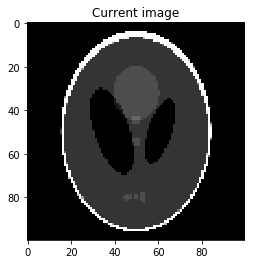

In [219]:
# load image into matplotlib and create matrix of numbers
img = mpimg.imread(filename.split(".")[0]+"edited.png")
showImage(img, "Current image")

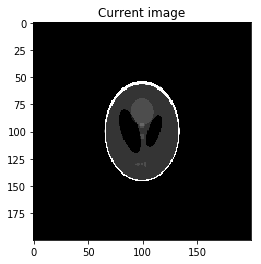

In [220]:
img = np.pad(img, pad_width=bordersize, mode='constant', 
               constant_values=0) 
showImage(img, "Current image")

In [221]:
# Computer fourier transform/absolute value:
b = np.abs(np.fft.fft2(img, norm='ortho'))
supp = (img != 0).astype(int)
print("Fourier modulus values:")
print(b)
print("Support:")
print(supp)

Fourier modulus values:
[[6.277843   5.183039   2.6062095  ... 0.21035476 2.6062095  5.183039  ]
 [4.264635   3.4014568  1.3944132  ... 0.59810835 1.4179412  3.3938344 ]
 [0.5715485  0.34814143 0.8250916  ... 1.349629   0.9867309  0.5319458 ]
 ...
 [1.746709   1.7447344  1.5694392  ... 0.98261416 1.4935846  1.6928184 ]
 [0.57154846 0.5319458  0.9867309  ... 1.2511696  0.8250916  0.34814143]
 [4.264635   3.3938344  1.4179412  ... 0.44145888 1.3944132  3.4014568 ]]
Support:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Algorithms

In [222]:
# Algorithm variables
numiterations = 1000
maxdist = 1e-4
displayperiod = 250
averageover = 100

### Projections

In [223]:
# projection onto image modulus constraint
def proj_c1(x):
    Fx = np.fft.fft2(x, norm='ortho')
    corrected = b * math.e**(1j*np.angle(Fx))
    #corrected = b*Fx/(np.abs(Fx)+1e-12)
    return np.fft.ifft2(corrected, norm='ortho')

In [224]:
# projection onto real number & non-negativity & support constraint
def proj_c2(x):
    return supp*(np.real(x).clip(min=0))

In [225]:
# projection onto real number & non-negativity ONLY
def real_nn(x):
    return np.real(x).clip(min=0)

### Stopping conditions

In [226]:
def stop_cond1(cnt):
    return (cnt < numiterations)

In [227]:
def stop_cond2(dist):
    return (dist > maxdist)

### Initial point (support)

In [228]:
def initialPoint():
    x = supp
    showImage(x, "Initial image")
    return x

### 1) Error reduction algorithm (a.k.a. method of alternating projections)

Number of iterations: 1000 Final distance: 0.00026785226487206293


Text(0.5, 1.0, 'Log of error between terms of the sequence')

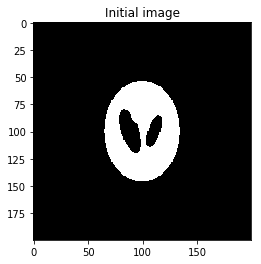

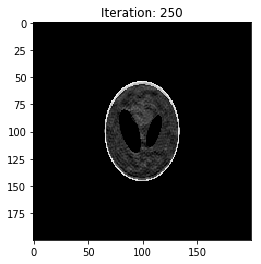

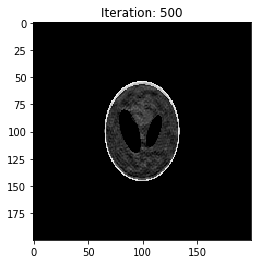

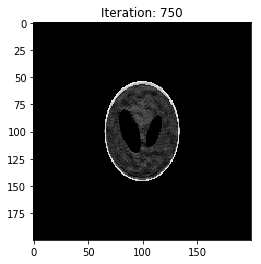

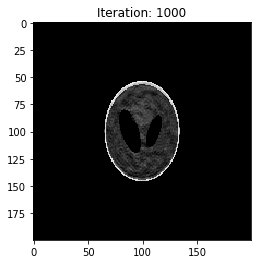

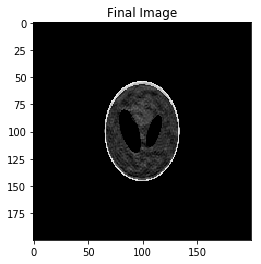

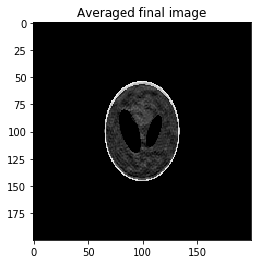

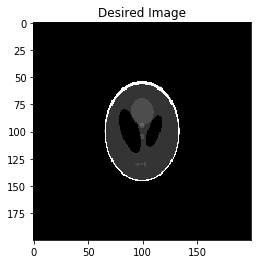

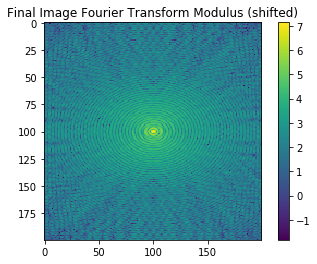

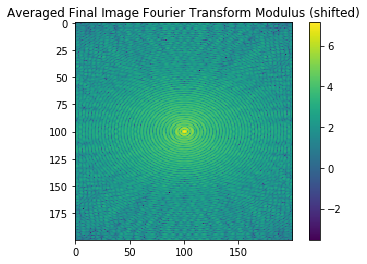

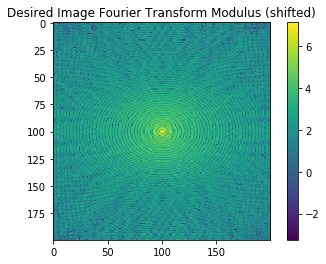

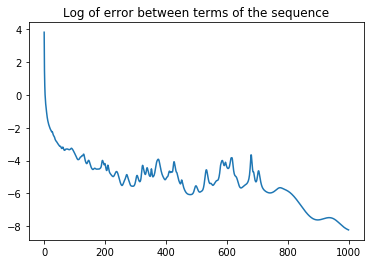

In [229]:
cnt = 0
dist = 1e12
finalX = []
x = initialPoint()
err = []
while(stop_cond1(cnt)):
    #print(dist)
    #print(cnt)
    xinit = x
    x = proj_c1(x)
    x = proj_c2(x)
    dist = np.linalg.norm(x-xinit)
    err.append(dist)
    cnt += 1
    if(cnt%displayperiod == 0):
        showImage(x, "Iteration: " + str(cnt))
    if(cnt >= averageover):
        finalX.append(x)
average= np.mean(finalX,axis=0)
showImage(x, "Final Image")
showImage(average, "Averaged final image")
showImage(img, "Desired Image")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(x)))),"Final Image Fourier Transform Modulus (shifted)")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(average)))),"Averaged Final Image Fourier Transform Modulus (shifted)")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(img)))),"Desired Image Fourier Transform Modulus (shifted)")
print("Number of iterations:", cnt, "Final distance:", dist)
plt.figure()
plt.plot(np.log(err))
plt.title("Log of error between terms of the sequence")

### 2) Fienup's Basic Input-Output Algorithm (a.k.a. Dykstra's algorithm)

C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


Number of iterations: 1000 Final distance: 9.056736272056238


Text(0.5, 1.0, 'Log of error between terms of the sequence')

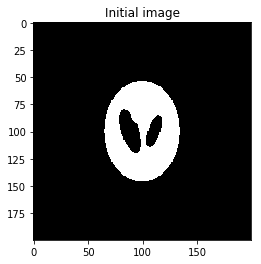

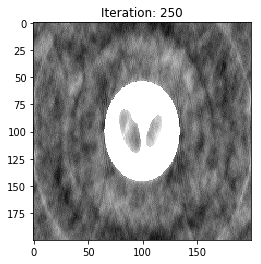

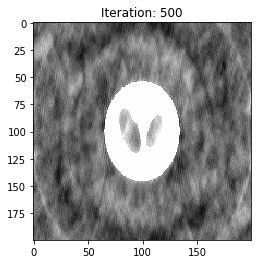

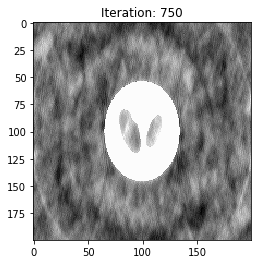

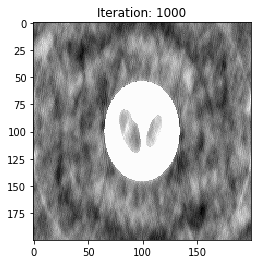

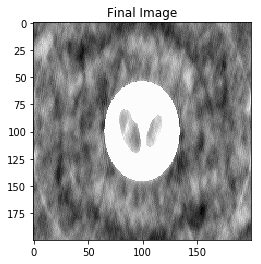

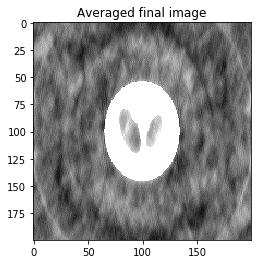

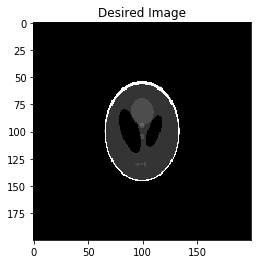

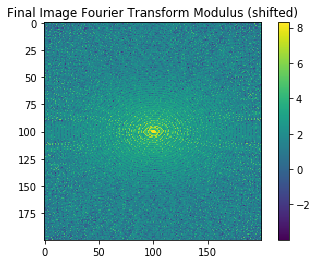

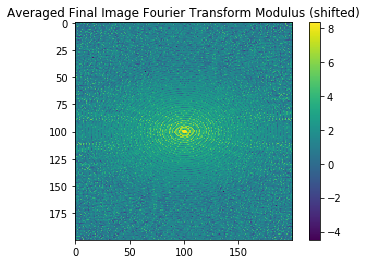

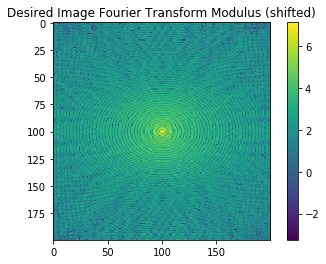

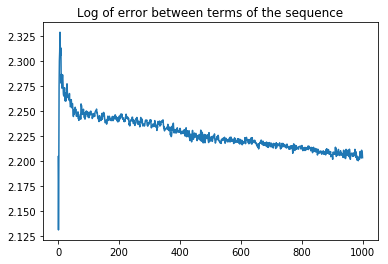

In [230]:
cnt = 0
dist = 1e12
finalX = []
err = []
x = initialPoint()
while(stop_cond1(cnt)):
    #print(dist)
    #print(cnt)
    xinit = x
    PmX = proj_c1(x)
    x = proj_c2(PmX) + x - PmX
    #x = real_nn(x)
    dist = np.linalg.norm(x-xinit)
    err.append(dist)
    cnt += 1
    if(cnt%displayperiod == 0):
        showImage(x, "Iteration: " + str(cnt))
    if(cnt >= averageover):
        finalX.append(x)
average= np.mean(finalX,axis=0)
showImage(x, "Final Image")
showImage(average, "Averaged final image")
showImage(img, "Desired Image")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(x)))),"Final Image Fourier Transform Modulus (shifted)")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(average)))),"Averaged Final Image Fourier Transform Modulus (shifted)")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(img)))),"Desired Image Fourier Transform Modulus (shifted)")
print("Number of iterations:", cnt, "Final distance:", dist)
plt.figure()
plt.plot(np.log(err))
plt.title("Log of error between terms of the sequence")

### 3) Fineup's Hybrid Input-Output Algorithm (a.k.a. Douglas-Rachford Algorithm)

C:\Users\Netanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


Number of iterations: 1000 Final distance: 0.003428859367448899


Text(0.5, 1.0, 'Log of error between terms of the sequence')

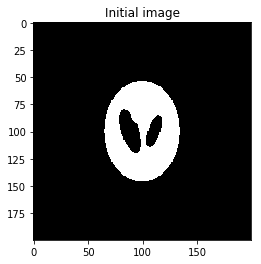

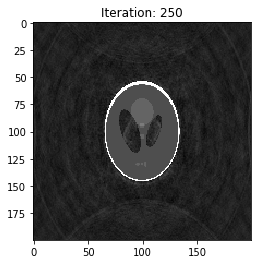

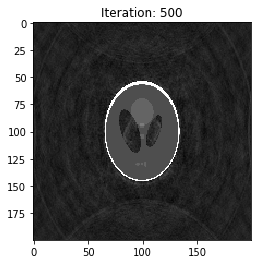

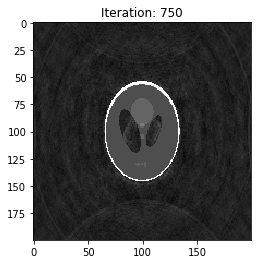

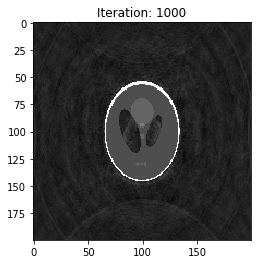

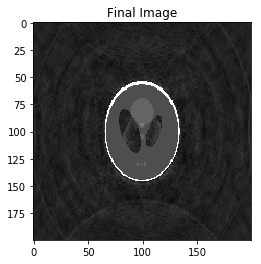

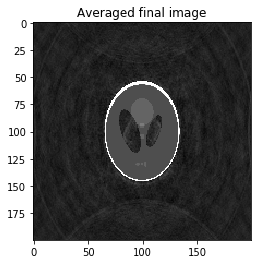

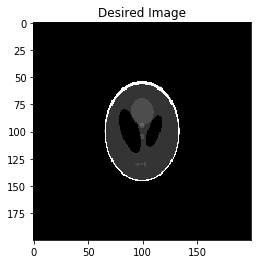

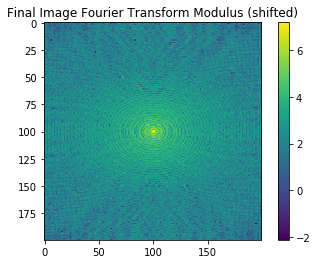

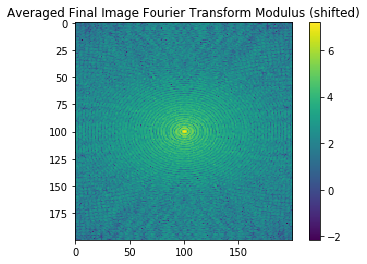

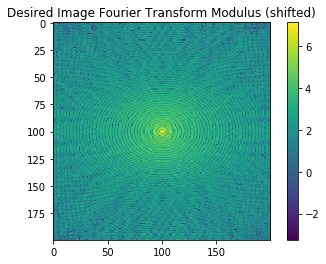

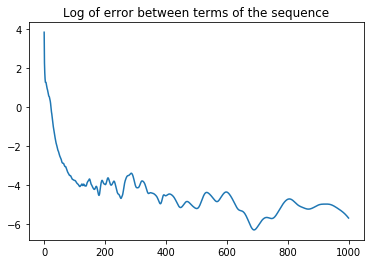

In [231]:
cnt = 0
dist = 1e12
finalX = []
err = []
x = initialPoint()

beta = 1

while(stop_cond1(cnt)):
    #print(dist)
    #print(cnt)
    xinit = x
    PmX = proj_c1(x)
    x = proj_c2(PmX) + x - beta*PmX - proj_c2(x) + beta*proj_c2(PmX)
    #x = real_nn(x)
    dist = np.linalg.norm(x-xinit)
    err.append(dist)
    cnt += 1
    if(cnt%displayperiod == 0):
        showImage(x, "Iteration: " + str(cnt))
    if(cnt >= averageover):
        finalX.append(x)
average= np.mean(finalX,axis=0)
showImage(x, "Final Image")
showImage(average, "Averaged final image")
showImage(img, "Desired Image")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(x)))),"Final Image Fourier Transform Modulus (shifted)")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(average)))),"Averaged Final Image Fourier Transform Modulus (shifted)")
showHeat(np.fft.fftshift(np.log(np.abs(np.fft.fft2(img)))),"Desired Image Fourier Transform Modulus (shifted)")
print("Number of iterations:", cnt, "Final distance:", dist)
plt.figure()
plt.plot(np.log(err))
plt.title("Log of error between terms of the sequence")